## Importing Module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
computers_data = pd.read_csv("C:\\Users\\satish.TRN\\WorkSpace2\\MachineLearning\\DataSets\\computers.csv")

In [3]:
computers_data.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


## Units indicates the number of faulty components in a  computer.
## Minutes indicates the time taken to replace those components.

Outlier are either less than Q1 - 1.5IQR or greater than Q3 + 1.5IQR where IQR = Q3 - Q1

In [4]:
computers_data.describe()

,Units,Minutes
count,14.000000,14.000000
mean,6.000000,97.214286
std,2.961289,46.217177
min,1.000000,23.000000
25%,4.000000,66.500000
50%,6.000000,96.500000
75%,8.750000,138.500000
max,10.000000,166.000000


Median of Minutes = 96.5, Mean of Minutes = 97.21

Imagine data didn't have units

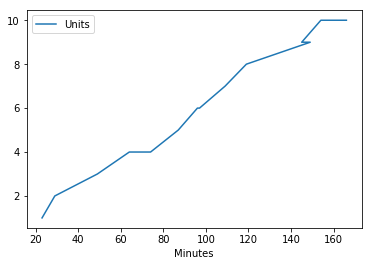

In [5]:
computers_data.plot("Minutes")

In [6]:
# 3 estimates
est1 = 10
est2 = 97.21
est3 = 150

In [7]:
# what is the quality metric that can say which estimate is better ?
# Difference between estimated time original time 'Calculating Variance'
(est1 - computers_data.Minutes).mean()

-87.21428571428571

In [8]:
(est2 - computers_data.Minutes).mean()

-0.004285714285727644

In [9]:
(est3 - computers_data.Minutes).mean()

52.785714285714285

Best estimate in the absence of other information - mean

In [10]:
# New quality metric based on the mean model

Text(0.5, 1.0, 'Co-Variance')

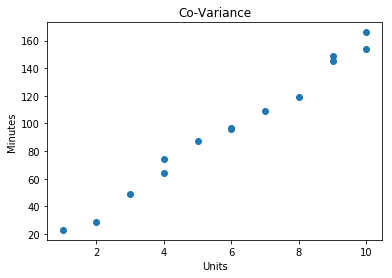

In [11]:
plt.scatter(computers_data.Units,computers_data.Minutes)
plt.xlabel('Units')
plt.ylabel('Minutes')
plt.title('Co-Variance')

In [12]:
computers_data.corr()

,Units,Minutes
Units,1.000000,0.993699
Minutes,0.993699,1.000000


In [13]:
import random
import numpy as np

In [14]:
r1 = np.random.randn(2,4).ravel()
r2 = np.random.randn(2,4).ravel()

In [15]:
r1

array([ 0.14456869,  0.17365274, -1.1904657 , -0.9658335 ,  0.02887179,
       -1.07731668, -1.15819382, -0.00935392])

In [16]:
r2

array([ 2.21583418,  0.47467646, -0.51116946,  1.52371219,  0.030997  ,
       -0.12640504,  0.13847915, -0.60733734])

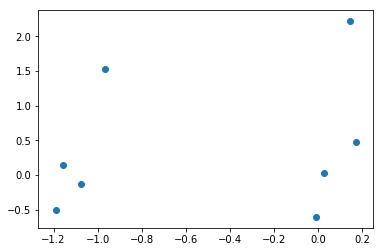

In [17]:
plt.scatter(r1,r2)

In [18]:
np.corrcoef(r1,r2)

array([[1.        , 0.25106841],
       [0.25106841, 1.        ]])

In [19]:
a = np.array([i for i in range(-100,100)])
b = 100*a*a

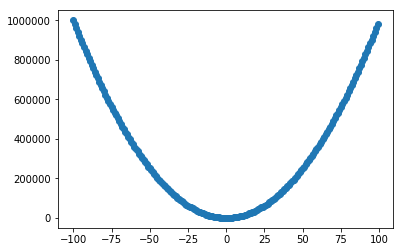

In [20]:
plt.scatter(a,b)

In [21]:
np.corrcoef(a,b)

array([[ 1.        , -0.01936225],
       [-0.01936225,  1.        ]])

In [23]:
# est_minutes = m * Units + C
m1,m2,m3 = 6,18,15
c1,c2,c3 = 10,8,7

In [24]:
computers_data['est1'] = m1*computers_data.Units + c1
computers_data['est2'] = m2*computers_data.Units + c2
computers_data['est3'] = m3*computers_data.Units + c3

In [26]:
computers_data

,Units,Minutes,est1,est2,est3
0,1,23,16,26,22
1,2,29,22,44,37
2,3,49,28,62,52
3,4,64,34,80,67
4,4,74,34,80,67
5,5,87,40,98,82
6,6,96,46,116,97
7,6,97,46,116,97
8,7,109,52,134,112
9,8,119,58,152,127


In [27]:
# Error = estData - actualData
computers_data['error1'] = computers_data.est1 - computers_data.Minutes
computers_data['error2'] = computers_data.est2 - computers_data.Minutes
computers_data['error3'] = computers_data.est3 - computers_data.Minutes

In [28]:
computers_data

,Units,Minutes,est1,est2,est3,error1,error2,error3
0,1,23,16,26,22,-7,3,-1
1,2,29,22,44,37,-7,15,8
2,3,49,28,62,52,-21,13,3
3,4,64,34,80,67,-30,16,3
4,4,74,34,80,67,-40,6,-7
5,5,87,40,98,82,-47,11,-5
6,6,96,46,116,97,-50,20,1
7,6,97,46,116,97,-51,19,0
8,7,109,52,134,112,-57,25,3
9,8,119,58,152,127,-61,33,8


In [29]:
# Average error when using est1 (model1)
computers_data.error1.mean()

-51.214285714285715

In [30]:
# Average error when using est2 (model2)
computers_data.error2.mean()

18.785714285714285

In [33]:
# Average error when using est3 (model3)
computers_data.error3.mean()

-0.21428571428571427

In [34]:
computers_data['mean_est'] = computers_data.Minutes.mean()

In [36]:
computers_data['error_mean'] = computers_data.mean_est - computers_data.Minutes

In [39]:
from sklearn.linear_model import LinearRegression

In [43]:
x = computers_data[['Units']]
y = computers_data[['Minutes']]
model = LinearRegression()

In [44]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
model.coef_, model.intercept_

(array([[15.50877193]]), array([4.16165414]))

In [49]:
m_best = model.coef_[0][0]
c_best = model.intercept_[0]
m_best,c_best

(15.508771929824565, 4.16165413533831)

In [50]:
computers_data['best_est'] = m_best*computers_data.Units + c_best

In [51]:
computers_data

,Units,Minutes,est1,est2,est3,error1,error2,error3,mean_est,error_mean,best_est
0,1,23,16,26,22,-7,3,-1,97.214286,74.214286,19.670426
1,2,29,22,44,37,-7,15,8,97.214286,68.214286,35.179198
2,3,49,28,62,52,-21,13,3,97.214286,48.214286,50.687970
3,4,64,34,80,67,-30,16,3,97.214286,33.214286,66.196742
4,4,74,34,80,67,-40,6,-7,97.214286,23.214286,66.196742
5,5,87,40,98,82,-47,11,-5,97.214286,10.214286,81.705514
6,6,96,46,116,97,-50,20,1,97.214286,1.214286,97.214286
7,6,97,46,116,97,-51,19,0,97.214286,0.214286,97.214286
8,7,109,52,134,112,-57,25,3,97.214286,-11.785714,112.723058
9,8,119,58,152,127,-61,33,8,97.214286,-21.785714,128.231830


In [ ]:
computers_data['error_best'] = 